In [1]:
pip install cifar10

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cifar10
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import time
import numpy as np

In [3]:
from sklearn import set_config
set_config(print_changed_only=False)

In [4]:
cifar10.data_path = "data/CIFAR-10/"

In [5]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [6]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
images_train, y_train, x_train = cifar10.load_training_data()
images_test, y_test, x_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [8]:
# img_train=(0.21*images_train[:,:,:,0])+(0.72*images_train[:,:,:,1])+(0.07*images_train[:,:,:,2])
# img_test=(0.21*images_test[:,:,:,0])+(0.72*images_test[:,:,:,1])+(0.07*images_test[:,:,:,2])
# img_train.shape

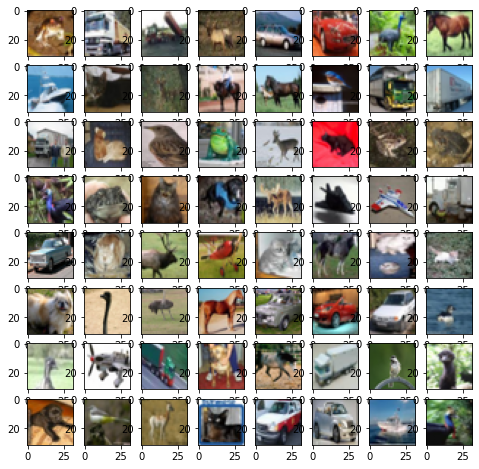

In [9]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i],cmap=plt.cm.bone)              # cmap is a theme
plt.show()

In [10]:
img_train=images_train.reshape((50000,3072))
img_test=images_test.reshape((10000,3072))

In [11]:
pca_oliv=PCA()
pca_oliv.fit(img_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
k=0
total=0
while total<0.99:
    total=total+pca_oliv.explained_variance_ratio_[k]
    k=k+1
k

658

In [13]:
pca_cif=PCA(n_components=k,whiten=True)
x_trans=pca_cif.fit_transform(img_train)
x_trans.shape

(50000, 658)

In [14]:
x_aprx=pca_cif.inverse_transform(x_trans)
x_aprox=x_aprx.reshape((50000,32,32,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

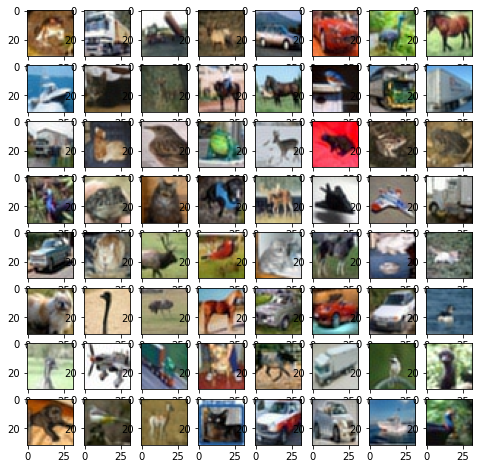

In [15]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_aprox[i],cmap=plt.cm.bone)              # cmap is a theme
plt.show()

In [16]:
x_train_img=x_trans
x_test_img=pca_cif.transform(img_test)
x_train_img.shape,x_test_img.shape

((50000, 658), (10000, 658))

## decision tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf=DecisionTreeClassifier()
clf.fit(x_train_img,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
y_pred=clf.predict(x_test_img)

In [20]:
clf.score(x_test_img,y_test)

0.2485

### random forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train_img,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_pred=clf.predict(x_test_img)
clf.score(x_test_img,y_test)

0.3908

## naive bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
clf=GaussianNB()
clf.fit(x_train_img,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
y_pred=clf.predict(x_test_img)

In [26]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.30      0.10      0.15      1000
           1       0.35      0.47      0.40      1000
           2       0.22      0.10      0.14      1000
           3       0.22      0.12      0.16      1000
           4       0.26      0.58      0.36      1000
           5       0.31      0.13      0.19      1000
           6       0.38      0.26      0.31      1000
           7       0.28      0.23      0.25      1000
           8       0.31      0.53      0.39      1000
           9       0.27      0.39      0.32      1000

    accuracy                           0.29     10000
   macro avg       0.29      0.29      0.27     10000
weighted avg       0.29      0.29      0.27     10000

[[100 100  40  39 180  23  43  49 338  88]
 [ 38 475  14  57  21  28  37  88 116 126]
 [ 30  71  97  40 394  40  76  40 123  89]
 [ 18  75  70 125 219  79  51  86 137 140]
 [  8  48  33  30 584  19  87  50  58  83]
 [ 14  74  68  75 221 134 

## SVM

In [27]:
# from sklearn.svm import SVC

In [28]:
# svc=SVC().fit(x_train_img,y_train)
# svc.coef_,svc.intercept_

In [29]:
# y_pred=svc.predict(x_test_img)
# svc.score(x_test_img,y_test)
# print(classification_report(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))

# KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
clf=KNeighborsClassifier(n_neighbors=50)
clf.fit(x_train_img,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [39]:
clf.score(x_test_img,y_test)

0.1085

# predict output

In [33]:
clf=GaussianNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [34]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000
           5       1.00      1.00      1.00      1000
           6       1.00      1.00      1.00      1000
           7       1.00      1.00      1.00      1000
           8       1.00      1.00      1.00      1000
           9       1.00      1.00      1.00      1000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

[[1000    0    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0    0 1000   

In [35]:
import numpy as np

In [36]:
ans=[]
for i in y_pred:
    ans.append(class_names[i])
ans1=np.array(ans)
ans1

array(['cat', 'ship', 'ship', ..., 'dog', 'automobile', 'horse'],
      dtype='<U10')

In [37]:
np.savetxt("predict_ans_1.csv" , ans1,fmt='%s')